In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [11]:
# CustomerID: 고객ID	Age:나이	Gender:성별	Tenure:이용 기간	Usage Frequency:사용빈도	Support Calls:	Payment Delay:결제 지연 횟수	Subscription Type: 구독 유형	Contract Length:계약 기간	Total Spend:총 지출	Last Interaction:마지막 상호작용 	Churn: 이탈여부(이탈:1, 유지:0)


In [12]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [13]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


Churn
0    33881
1    30493
Name: count, dtype: int64


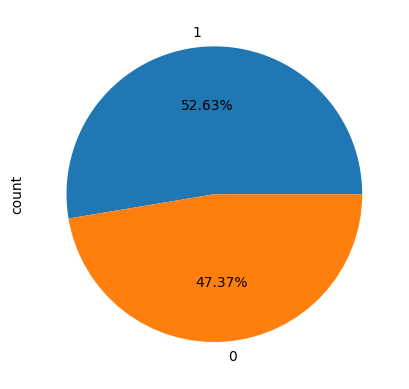

In [16]:
count_churn = data['Churn'].value_counts()
print(count_churn)
count_churn.plot(kind='pie',
                 autopct= '%.2f%%',
                 labels= data['Churn'])
plt.show()


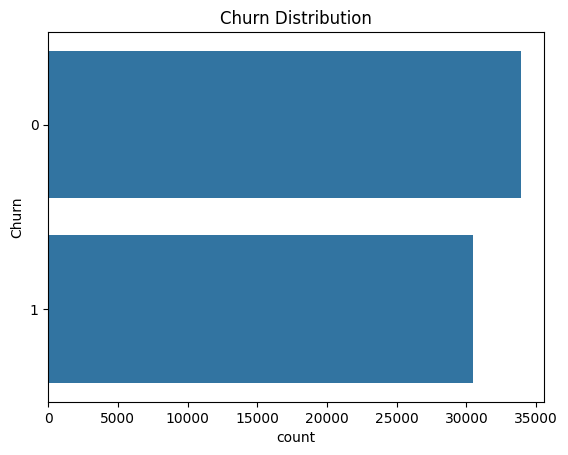

In [19]:
sns.countplot(y= 'Churn', data=data)
plt.title('Churn Distribution')
plt.show()

In [22]:
data1 = pd.get_dummies(data=data,drop_first=True)
data1 = data1.astype(int)

<Axes: >

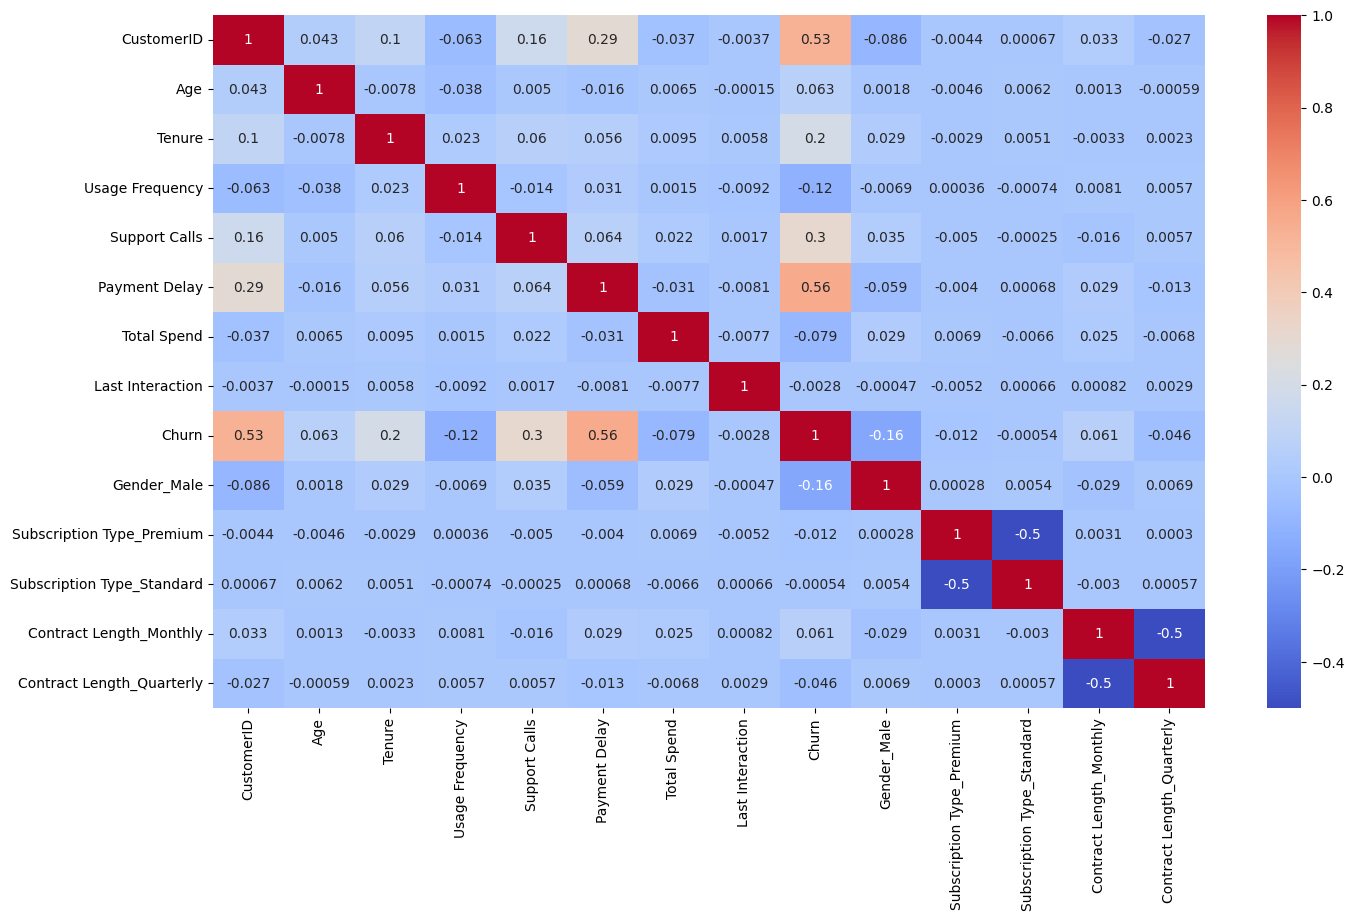

In [23]:
corr=data1.corr()

plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [24]:
total_customers = data.CustomerID.nunique()
churned_customers = data[data.Churn == 1]['CustomerID'].nunique()
churn_rate = churned_customers / total_customers

print("전체 이탈 고객 비율: {:.2f}%".format(churn_rate * 100))

전체 이탈 고객 비율: 47.37%


<ipython-input-25-bd1cecc961d6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Age', data=df, palette='Pastel2')


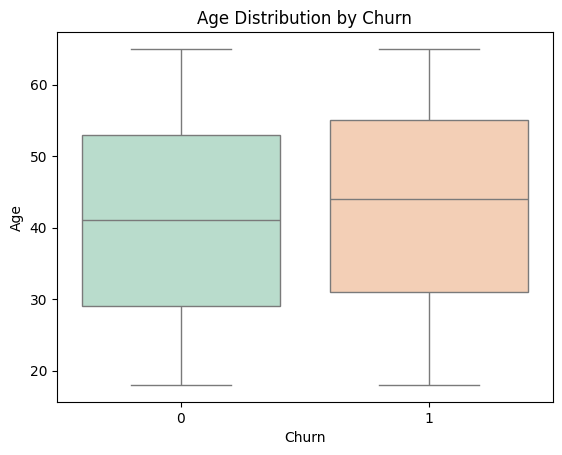

In [25]:
sns.boxplot(x='Churn', y='Age', data=df, palette='Pastel2')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Age Distribution by Churn')
plt.show()